# Exercise set 3

>The goal of this exercise is to perform least squares regression and calculate some metrics for evaluating the regression ($R^2$ and residuals). We will also deal with a categorical variable.

## Exercise 3.1

[Crampton](https://doi.org/10.1093/jn/33.5.491) studied the effect of vitamin C on
Guinea pigs' teeth.<a name="cite_ref-1"></a>[<sup>†</sup>](#cite_note-1)
The guinea pigs were given vitamin C
(either as orange juice or as ascorbic acid in water)
at three different levels (0.5, 1, and 2 mg/day) and the
length of their odontoblasts (cells that are important for tooth development) were measured after six weeks.
The file [Data/guinea.csv](Data/guinea.csv) contains the measured lengths, delivery method, and
dosage (see the description in Table 1).


| Column     | Description                                              |
|:-----------|:---------------------------------------------------------|
| length     | Measured length of odontoblasts  (unit not given). |
| delivery   | How the vitamin C was administered: either as ascorbic acid in water (“W”) or as orange juice (“O”).            |
| dose       | Dosage of vitamin C (mg/day).                            |
||**Table 1:** *Data columns present in the file [guinea.csv](Data/guinea.csv)*|


<a name="cite_note-1"></a>[<sup>†</sup>](#cite_ref-1) The Canadian Government had difficulty providing natural sources of vitamin C to its armed forces during World War II. Different foods were tested for their potency, but the different chemical
procedures used at the time frequently gave inconsistent results. This study was carried out to establish a vitamin C bioassay that the chemical procedures could be checked against.

### 3.1(a)

Plot the length as a function of the dose and fit a straight line (giving the length as a function of the dose)
using least squares. Add the
straight line to the plot, calculate $R^2$ and add this to a suitable place in your figure. Does the
length increase or decrease with the dosage?

Below, there is also code that uses ANOVA to analyse the effect of the dose on the length. Run this code. Do the ANOVA results indicate that the dose affects the length?

In [1]:
# Here is some code to get you started:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score  # For calculating R²

sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# Load the data
data = pd.read_csv("Data/guinea.csv")
data.head()

C:\Users\joach\AppData\Local\Temp\ipykernel_9152\3352305924.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,length,delivery,dose
0,4.2,W,0.5
1,11.5,W,0.5
2,7.3,W,0.5
3,5.8,W,0.5
4,6.4,W,0.5


In [2]:
# Here is some code for fitting a straight line:
x = data["dose"]
y = data["length"]
p = np.polyfit(x, y, deg=1)
# p = the coefficients of a polynomial of degree "deg" fitted using x and y.
# To evaluate the polynomial, you can use numpy.polyval:
y_hat = np.polyval(
    p, x
)  # Calculate y using p and x: y = p[0] * x^(N-1) + ... + p[N-1]

# To calculate R², we only need the real y-values
# and the y-values predicted by the model:
r2 = r2_score(y, y_hat)
print(f"R² = {r2}")

R² = 0.6461833508398673


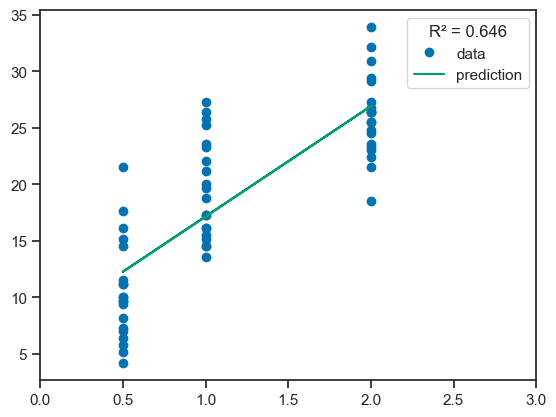

In [27]:
# Add your code for plotting here:
fig, ax = plt.subplots()
ax.plot(x, y, "bo")
ax.plot(x, y_hat, "g-")
ax.set(xlim=[0, max(x)+1])
ax.legend(["data", "prediction"], title = "R² = 0.646")

In [32]:
# Code for running ANOVA:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("length ~ C(dose)", data=data).fit()
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(dose),2419.146333,2.0,67.79112,8.528462e-16
Residual,1017.031000,57.0,NaN,NaN


### Answer to question 3.1(a):

The length seems to be increasing with dose based on the slope of the fitted model.

The very small p-value indicates that the dose has a significant effect on length


### 3.1(b)
Is the measured length longer when the guinea pigs are given orange juice?
Investigate this by comparing two least squares models: 

- (i) One for the length as a function of the dose for delivery = W,
- (ii) and one for the length as a function of the dose for delivery = O.

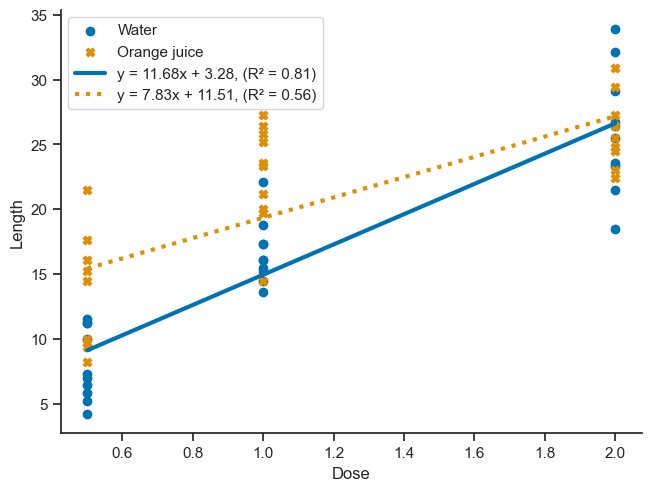

In [72]:
# Your code here

# Note you can select from the pandas data frame like this:
water = data[data["delivery"] == "W"]
x_w = water["dose"]
y_w = water["length"]
p_w = np.polyfit(x_w, y_w, deg = 1)
p_what = np.polyval(p_w, x_w)
r_w = r2_score(y_w, p_what)

oj = data[data["delivery"] == "O"]
x_oj = oj["dose"]
y_oj = oj["length"]
p_oj = np.polyfit(x_oj, y_oj, deg = 1)
p_ojhat = np.polyval(p_oj, x_oj)
r_oj = r2_score(y_oj, p_ojhat)

fig, ax = plt.subplots(constrained_layout=True)
scat1 = ax.scatter(x_w, y_w, label="Water")
scat2 = ax.scatter(x_oj, y_oj, label="Orange juice", marker="X")

ax.plot(
    x_w,
    p_what,
    color=scat1.get_facecolor(),
    lw=3,
    label=(
        f"y = {p_w[0]:.2f}x + {p_w[1]:.2f}, "
        f"(R² = {r_w:.2f})"
    )
)

ax.plot(
    x_oj,
    p_ojhat,
    color=scat2.get_facecolor(),
    lw=3,
    ls=":",
    label=(
        f"y = {p_oj[0]:.2f}x + {p_oj[1]:.2f}, " f"(R² = {r_oj:.2f})"
    ),
)
ax.set(xlabel="Dose", ylabel="Length")
ax.legend()
sns.despine(fig=fig)


### Answer to question 3.1(b):

The length when given orange juce is higher for lower doses, but converges with the water-administered dose when it reaches approximately 2. Both have positive growth, but water-administered dose has larger growth, and the model fits better than for orange juice and both data combined. 

### 3.1(c)

Include the delivery as an additional variable in a new least
squares model on the form,

\begin{equation}
y = b_0 + b_1 x_1 + b_2 x_2 + b_{12} x_1 x_2,
\end{equation}

where $y$ represents the length of odontoblasts, $x_1$ is the dose,
$x_2$ the variable representing the delivery, and $b_i$ are the
coefficients.
You will first have to convert the delivery variable
to numerical variables; see the [appendix](#Appendix:-Categorical-variables) for a short explanation.

The term $b_{12} x_1 x_2$ represents an *interaction*. The
interaction term will tell you how the effect on $y$ of one
variable changes depending on the level of the other
variable. 
After having created the model, how do you
interpret the sign of the $b_{12}$ coefficient?

The Jupyter version of the exercise includes code
that uses ANOVA to analyse the effect of the dose and delivery on the length.
Run this code. How do you interpret the ANOVA results?

In [ ]:
# Example: Creating new variables with dummies:
data2 = pd.get_dummies(data, columns=["delivery"])
data2.head()

In [ ]:
# Example: Creating a least squares model with scikit-learn:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)  # Set ut the model
model.fit(X, y)  # Fit it using X and y, note there that:
# X should contain all the columns you are interested in, but not a column of ones.
# The constant is take care of automatically with fit_intercept=True.
y_hat = model.predict(X)  # Use the model for calculating something (y from X).
r2 = r2_score(y, y_hat)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_two = ols(
    "length ~ C(dose) + C(delivery) + C(dose):C(delivery)", data=data
).fit()
table_two = sm.stats.anova_lm(model_two, typ=2)
table_two

### Answer to question 3.1(c):
*Double click here*

## Exercise 3.2

Assume that we have recorded data as shown in Fig. 1.

<figure>
<img src="Figures/Fig_3_1.png" width="50%">
    <figcaption> <p style='text-align: center;'><b>Figure 1: </b>Points for Exercise 3.2.</p> </figcaption>
</figure>

To model this data (i.e. $y$ as a function of $x$), we suggest a third-order polynomial in $x$:

\begin{equation}
y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 .
\end{equation}

Explain how you can formulate this on a form suitable for least-squares regression,
$\mathbf{y} = \mathbf{X} \mathbf{b}$:

- (a) What do the vectors $\mathbf{y}$ and $\mathbf{b}$ contain?
- (b) What does the matrix $\mathbf{X}$ contain?

### Answer to question 3.2:
*Double click here*

## Exercise 3.3

The temperature (°C) is measured continuously over time at a high altitude
in the atmosphere using a
weather balloon. Every hour a measurement is made and sent to an onboard computer.
The measurements are 
shown in Fig. 2 and can be found in [the data file](Data/temperature.txt) (located at 'Data/temperature.txt').

<figure>
<img src="Figures/Fig_3_2.png" width="50%">
<figcaption><p style='text-align: center;'><b>Fig. 2:</b> Measured temperature as a function of time.</p></figcaption> 
</figure>

### 3.3(a)
Create a Python script that performs polynomial fitting to the data using a first-, second-,
third-, fourth-, and fifth-order polynomial model. Plot the fitted curves for the five models
together with the raw data.

In [ ]:
# Here is some code to get you started:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# Load the data
data = pd.read_csv("Data/temperature.txt", sep="\s+")
data.head()

In [ ]:
# Select the x and y values
xdata = data["hour"]
ydata = data["yobs"]
# Fit a 5th order polynomial:
p = np.polyfit(xdata, ydata, deg=5)
y_hat = np.polyval(p, xdata)

### 3.3(b)
Plot the residual curves for the five models and determine,
from a visual inspection, the best polynomial order to use for modeling the
temperature as a function of time.

In [ ]:
# Your code here

### Answer to question 3.3(b)
*Double click here*

### 3.3(c)
Obtain the sum of squared residuals for each polynomial and plot this as a function of the
polynomial degree. Use this plot to determine (from visual inspection) the best polynomial
order for modeling the temperature as a function of time. Does this agree with your
conclusion in point [(b)](#3.3(b))?

In [ ]:
# Your code here

### Answer to question 3.3(c)
*Double click here*

## Appendix: Categorical variables
The delivery in exercise [3.1](#Exercise-3.1)
is a categorical variable (it is either W or O).
To include it in a model,
we first have to convert the categories to numerical values to do math with them.
Let us first think of
a more general case with $N$ categories.
It could be tempting to represent each category with a number, $1$, $2$, $3$, and so on, but this
is not a good idea. A numeric representation like that introduces
an artificial ordering: e.g., $5$ is a larger number than $1$, but that does not make sense for categories!

One way to fix this and include
categorical variables is
to use [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).
(And another way is [one-hot encoding](https://en.wikipedia.org/wiki/One-hot))

With dummy variables, we add more variables that can take values 0 or 1 for `off`/`on`.
If we have
$N$ categories, we need $N-1$ dummy variables to represent the categories.
We can then include the "presence" of the categories without adding an order.
Since this is a standard operation, there is an automatic method to do this in
pandas: [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).